# [Kaggle - TalkingData AdTracking Fraud Detection Challenge](https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection)

Our task is to predict where a click on some advertising is fraudlent given a few basic attributes about the device that made the click. What sets this competition apart is the sheer scale of the dataset: **with 240 million rows**.

Looking at the evaluation page, we can see that the evaluation metric used is** ROC-AUC** (the area under a curve on a Receiver Operator Characteristic graph). In other words:

- This competition is a **binary classification** problem - i.e. our target variable is a binary attribute (Is the user making the click fraudlent or not?) and our goal is to classify users into "fraudlent" or "not fraudlent" as well as possible

- Unlike metrics such as [LogLoss](http://www.exegetic.biz/blog/2015/12/making-sense-logarithmic-loss/), the AUC score only depends on **how well you can separate the two classes**. In practice, this means that only the order of your predictions matter.

  - As a result of this, any rescaling done to your model's output probabilities will have no effect on your score. In some other competitions, adding a constant or multiplier to your predictions to rescale it to the distribution can help but that doesn't apply here.
  
If you want a more intuitive explanation of how AUC works, I recommend [this post](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it).
  
Let's dive right in by looking at the data we're given:

Due to the sheer scale of the dataset, it is most likely that this dataset won't fit in memory of most laptops. One solution to this is to use **Dask** 

In [1]:
from dask.distributed import Client
client = Client()
client

<Client: scheduler='tcp://10.16.1.9:8786' processes=8 cores=8>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
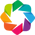

In [2]:
import gcsfs
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import holoviews as hv
hv.extension('bokeh')
from holoext.bokeh import Mod

In [7]:
import dask.dataframe as dd

In [8]:
dtypes = {
        'ip':'category',
        'app': 'category',
        'device': 'category',
        'os': 'category',
        'channel': 'category',
        'is_attributed': 'uint8'
        }

In [9]:
df = dd.read_csv('gcs://kaggle-talkingdata-bucket/train.csv', 
                 parse_dates=['click_time', 'attributed_time'], 
                 dtype=dtypes)

In [10]:
df = client.persist(df)

In [11]:
df.dtypes

ip                       category
app                      category
device                   category
os                       category
channel                  category
click_time         datetime64[ns]
attributed_time    datetime64[ns]
is_attributed               uint8
dtype: object

In [12]:
df.head()

ip app device  os channel          click_time attributed_time  \
0   83230   3      1  13     379 2017-11-06 14:32:21             NaT   
1   17357   3      1  19     379 2017-11-06 14:33:34             NaT   
2   35810   3      1  13     379 2017-11-06 14:34:12             NaT   
3   45745  14      1  13     478 2017-11-06 14:34:52             NaT   
4  161007   3      1  13     379 2017-11-06 14:35:08             NaT   

   is_attributed  
0              0  
1              0  
2              0  
3              0  
4              0

In [13]:
df.tail()

ip app device  os channel          click_time attributed_time  \
1220047  121312  12      1  10     340 2017-11-09 16:00:00             NaT   
1220048   46894   3      1  19     211 2017-11-09 16:00:00             NaT   
1220049  320126   1      1  13     274 2017-11-09 16:00:00             NaT   
1220050  189286  12      1  37     259 2017-11-09 16:00:00             NaT   
1220051  106485  11      1  19     137 2017-11-09 16:00:00             NaT   

         is_attributed  
1220047              0  
1220048              0  
1220049              0  
1220050              0  
1220051              0

## Looking at the features

Each row of the training data contains a click record, with the following features.:

- ip: ip address of click
- app: app id for marketing
- device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
- os: os version id of user mobile phone
- channel: channel id of mobile ad publisher
- click_time: timestamp of click (UTC)
- attributed_time: if user download the app for after clicking an ad, this is the time of the app download
- is_attributed: the target that is to be predicted, indicating the app was downloaded

**NOTE:**

- By looking at the data samples above, you'll notice that all these variables are encoded - meaning we don't know what the actual value corresponds to - each value has instead been assigned an ID which we're given. This has likely been done because data such as IP addresses are sensitive, although it does unfortunately reduce the amount of feature engineering we can do on these.
    
- The attributed_time variable is only available in the training set - it's not immediately useful for classification but it could be used for some interesting analysis (for example, one could fill in the variable in the test set by building a model to predict it).


In [14]:
%time len(df)

CPU times: user 91 ms, sys: 7 ms, total: 98 ms
Wall time: 8.67 s


184903890

We can see that the training set consists of **184,903,890 rows**.

Now let's do a quick inspection of unique counts for each feature in our dataset. 

In [15]:
%%time 
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(df[col].unique().compute()) for col in cols]

CPU times: user 232 ms, sys: 15 ms, total: 247 ms
Wall time: 7.75 s


There is so much awesomeness in Dask dashboard. Below is a dask in action while performing the previous computation. 

![](https://i.imgur.com/s9OHSET.gif)

Let's add the previous results to a a dataframe and do some visualization with Holoviews. 

In [16]:
unique_counts = pd.DataFrame({'feature': cols, 'unique_counts': uniques})
unique_counts.head()

feature  unique_counts
0       ip         277396
1      app            706
2   device           3475
3       os            800
4  channel            202

In [17]:
a = hv.Bars(unique_counts, vdims=['unique_counts'])
Mod(logy=True,
    title='Number of unique values per feature',
    xlabel='Feature',
    ylabel='log(unique count)').apply(a)

:Bars   [feature]   (unique_counts)

In [18]:
df.describe().compute()

is_attributed
count   1.849039e+08
mean    2.470721e-03
std     4.964491e-02
min     0.000000e+00
25%     0.000000e+00
50%     0.000000e+00
75%     0.000000e+00
max     1.000000e+00

In [19]:
%%time 
(df[['attributed_time', 'is_attributed']][df['is_attributed'] == 1]).compute().describe()

CPU times: user 262 ms, sys: 23 ms, total: 285 ms
Wall time: 3.13 s


is_attributed
count       456846.0
mean             1.0
std              0.0
min              1.0
25%              1.0
50%              1.0
75%              1.0
max              1.0

**Takeaway**

- There are only  $456,846$ `attributed_time` values. This means only $456,846$ out of $184,903,890$ clicks resulted in a download. That's about **$0.247\%$**!

## How many click triggers per ip?

In [23]:
%time ip_clicks = df.groupby('ip').count().compute()

CPU times: user 109 ms, sys: 36 ms, total: 145 ms
Wall time: 18.8 s


In [26]:
ip_clicks.head()

app  device    os  channel  click_time  attributed_time  \
ip                                                                 
100002  2404    2404  2404     2404        2404                3   
100009  8054    8054  8054     8054        8054               13   
100013  8698    8698  8698     8698        8698                5   
100020  1229    1229  1229     1229        1229                2   
100032  1566    1566  1566     1566        1566                2   

        is_attributed  
ip                     
100002           2404  
100009           8054  
100013           8698  
100020           1229  
100032           1566

In [25]:
ip_clicks.describe()

app        device            os       channel    click_time  \
count  2.773960e+05  2.773960e+05  2.773960e+05  2.773960e+05  2.773960e+05   
mean   6.665701e+02  6.665701e+02  6.665701e+02  6.665701e+02  6.665701e+02   
std    5.446831e+03  5.446831e+03  5.446831e+03  5.446831e+03  5.446831e+03   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
50%    1.300000e+01  1.300000e+01  1.300000e+01  1.300000e+01  1.300000e+01   
75%    1.490000e+02  1.490000e+02  1.490000e+02  1.490000e+02  1.490000e+02   
max    1.238734e+06  1.238734e+06  1.238734e+06  1.238734e+06  1.238734e+06   

       attributed_time  is_attributed  
count    277396.000000   2.773960e+05  
mean          1.646909   6.665701e+02  
std           8.023996   5.446831e+03  
min           0.000000   1.000000e+00  
25%           1.000000   3.000000e+00  
50%           1.000000   1.300000e+01  
75%           1.000000   1.490000e+02  
max        2340.000000   1.238734e+06

Let's sort this dataframe in descending order. 


In [42]:
ip_df = ip_clicks[['click_time', 'is_attributed']].sort_values(by=['click_time'], ascending=False)
ip_df.head()

click_time  is_attributed
ip                              
5348      1238734        1238734
5314      1171448        1171448
73516      770451         770451
73487      763854         763854
53454      498186         498186

In [43]:
ip_df.tail()

click_time  is_attributed
ip                               
359472           1              1
148958           1              1
216386           1              1
216717           1              1
331467           1              1

We will inspect the first 50 entries to see that their click counts is compared to the rest. 

In [50]:
kdims = ip_df.index.name
vdims = [('click_time', 'click count'), ('is_attributed', 'is_attributed_count')]
ip_ds = hv.Dataset(ip_df[:50], vdims=vdims, kdims=kdims)
ip_ds

:Dataset   [ip]   (click_time,is_attributed)

In [53]:
%%opts Scatter [width=600 height=250]
a = ip_ds.to(hv.Bars)
Mod(logy=True, ylabel='log(click count)', title='count of clicks per ip').apply(a)

:Bars   [ip]   (click_time,is_attributed)

**Takeaway**

- There are ip addresses that trigger a click over $1,200,000$ times. This is very strange that one ip address would click that often considering the fact that the training dataset spans **4 days**.

## How many clicks were followed by App download?

In [56]:
mean = (df.is_attributed.values == 1).mean()

In [58]:
# Let's visualize the graph that Dask will use to compute the results
mean.visualize(optimize_graph=True, format='png')